In [1]:
%matplotlib inline
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
import matplotlib.image as mpimg
from tensorflow.keras.utils import to_categorical

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


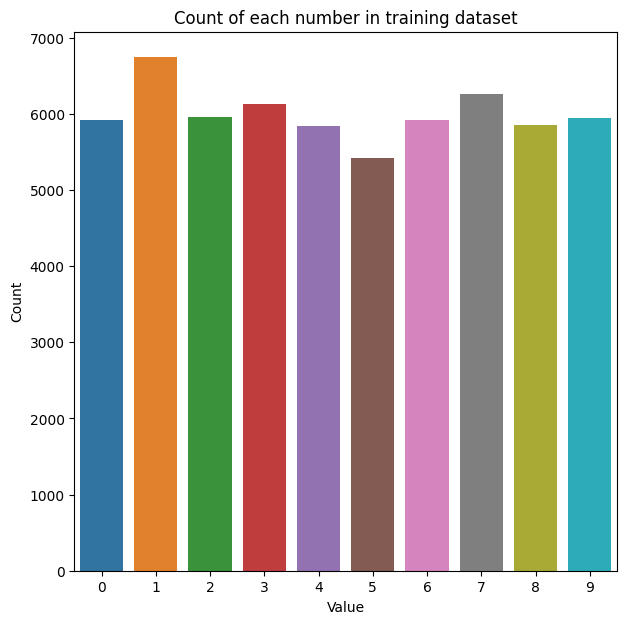

In [3]:
sns.countplot(x=y_train, order=range(10))  # Use your data and choose a palette, specify the order of x-axis values

# Add labels and a title
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Count of each number in training dataset")

# Show the plot
plt.show()

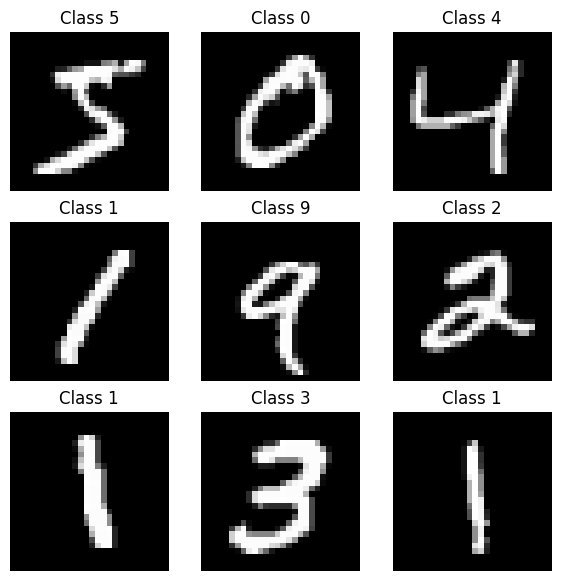

In [4]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Class {}".format(y_train[i]))
  plt.grid(None)
  plt.axis('off')

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (60000, 28, 28)
Testing matrix shape (10000, 28, 28)


In [6]:
distinct_values = np.unique(y_test)
print(distinct_values)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

[0 1 2 3 4 5 6 7 8 9]


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


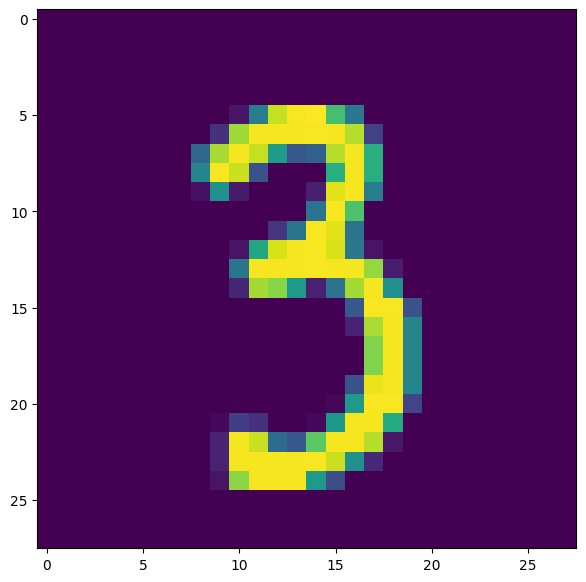

In [7]:
plt.imshow(x_train[98].reshape(28,28))
print(y_train[98])

In [8]:
batch_size = 64
num_classes = 10
epochs = 5

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [11]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 [==============================] - 32s 11ms/step - loss: 0.2161 - acc: 0.9332 - val_loss: 0.0497 - val_acc: 0.9845
Epoch 2/5
844/844 [==============================] - 6s 8ms/step - loss: 0.0750 - acc: 0.9787 - val_loss: 0.0625 - val_acc: 0.9817
Epoch 3/5
844/844 [==============================] - 7s 8ms/step - loss: 0.0583 - acc: 0.9834 - val_loss: 0.0278 - val_acc: 0.9925
Epoch 4/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0493 - acc: 0.9861 - val_loss: 0.0283 - val_acc: 0.9923
Epoch 5/5
844/844 [==============================] - 7s 8ms/step - loss: 0.0464 - acc: 0.9871 - val_loss: 0.0238 - val_acc: 0.9930


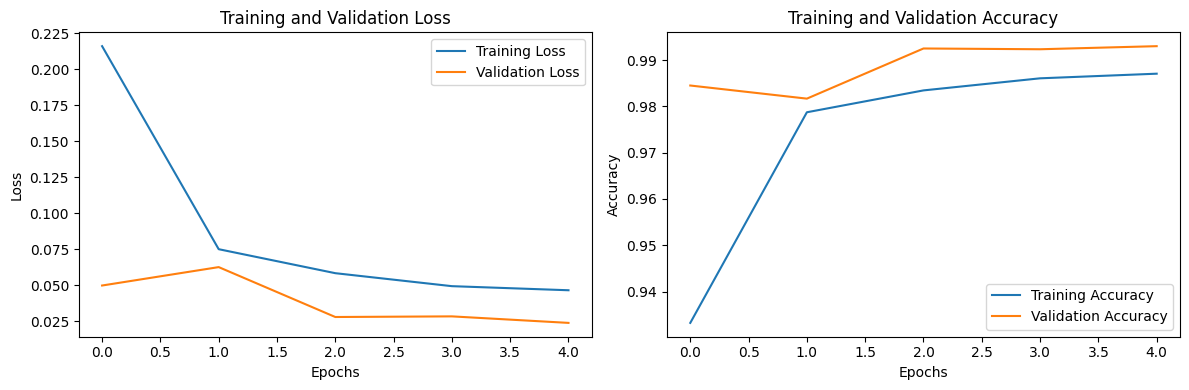

In [12]:
# Extract the training and validation loss and accuracy (or other metrics)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['acc']
val_acc = history.history['val_acc']

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 4))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot the training and validation accuracy (or other metrics)
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # Change this label if using a different metric
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0200 - acc: 0.9932


313/313 [==============================] - 1s 2ms/step


<Axes: >

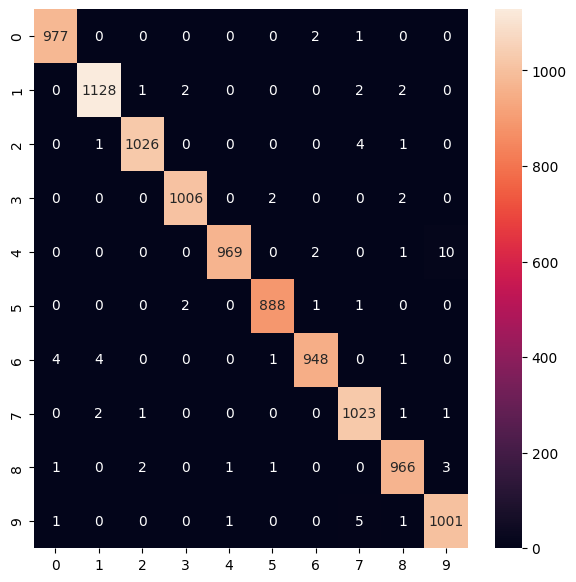

In [14]:
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matr = tf.math.confusion_matrix(y_true, y_pred_class)
sns.heatmap(conf_matr, annot=True, fmt='g')

In [15]:
print(y_pred.shape)
print(y_test.shape)

(10000, 10)
(10000, 10)


In [16]:
correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(np.argmax(y_pred, axis=1) != np.argmax(y_test, axis=1))[0]
incorrect_indices

array([ 321,  449,  582,  619,  659,  716,  740,  947,  965, 1014, 1039,
       1112, 1114, 1299, 1549, 1621, 1691, 1790, 1901, 2018, 2118, 2130,
       2135, 2182, 2266, 2293, 2447, 2597, 2631, 2654, 2771, 3030, 3060,
       3073, 3225, 3288, 3422, 3534, 3727, 3767, 3808, 4224, 4265, 4571,
       4699, 4740, 4761, 4783, 4807, 4860, 4956, 5937, 5955, 6555, 6571,
       6576, 6597, 6625, 8094, 8408, 8520, 8527, 9642, 9664, 9679, 9692,
       9729, 9839])

In [17]:
np.argmax(y_test, axis=1)

array([7, 2, 1, ..., 4, 5, 6])

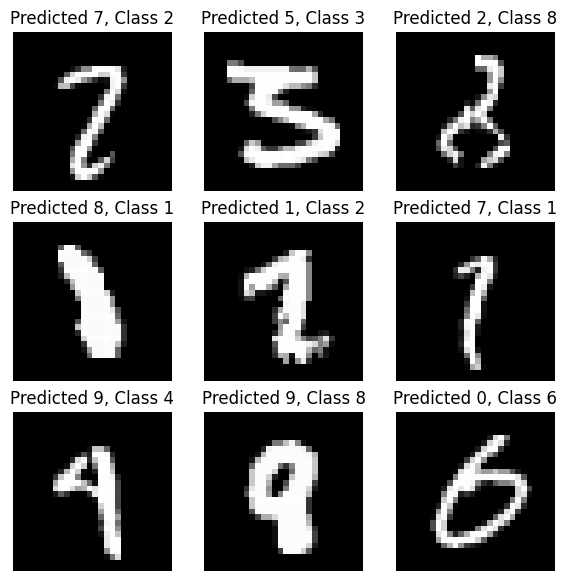

In [18]:
'''
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_class[correct], np.argmax(y_test[correct])))
    plt.axis('off')
'''
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_class[incorrect],  np.argmax(y_test[incorrect])))
    plt.axis('off')

In [19]:
from keras.models import load_model

model.save('MNIST_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
